# ANALISIS EXPLORATORIO

In [37]:
#Cargamos librerias
library(caTools)
library(caret)
library(corrplot)
library(CatEncoders)
library(neuralnet)
library(e1071)

In [38]:
set.seed(1)
#Leer el archivo, donde los datos vacios se rellenan de NA's
mobileData = read.csv("train.csv", header = TRUE,sep=",", na.strings="NA") #

## Deteccion de valores nulos

In [39]:
sum(is.na(mobileData)) #Contamos los valores nulos

[1] 0

- Se observa que no existe valores nulos, por lo que no habran que realizar ningun reemplazo por la media, mediana o moda.

In [40]:
str(mobileData)

'data.frame':	2000 obs. of  21 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : int  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : int  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : int  20 905 1263 1216 1208 1004 381 512 386 1137 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_h         : int  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : i

 - Observamos que todos los datos son de tipos numericos, por lo que no habra necesidad de realizar una conversion de categorico a numerico.

## Correlacion y Covarianza

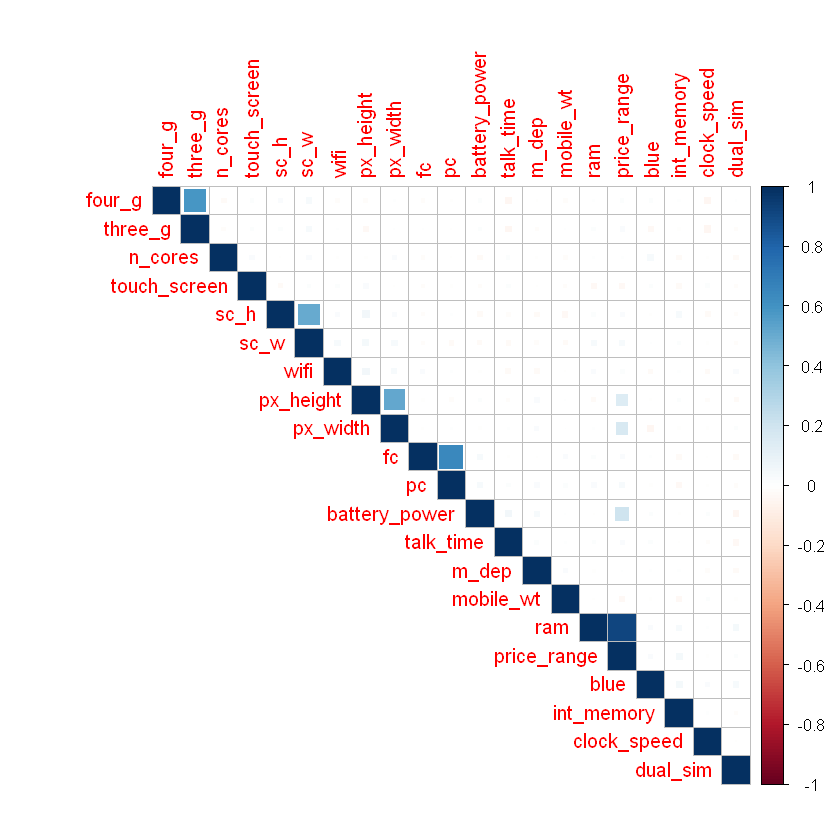

In [41]:
#Graficamos el mapa de calor para analizar la correlacion y covarianza
library(corrplot)
corrplot(cor(mobileData), type="upper", order="hclust", method="square")

- Del Mapa de Calor, observamos que existen variables con alta correlacion, por lo tanto para mayor detalle verificamos su dependencia, mediante la correlacion y covarianza.

**Correlacion alta entre variables independientes**

In [42]:
library(caret)
#Hallamos la matriz de correlacion
correlationMatrix <- cor(mobileData[,])
#Filtramos las columnas que tenga una correlacion superior a 0.8
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.80)
cor(mobileData$price_range  , mobileData[highlyCorrelated], method = "pearson") 

price_range
1


- A pesar que no existe altas correlaciones entre variables, calculamos la covarianza de las variables que visualmente segun el mapa de calor se encuentra en un alto rango, de tal forma que podamos descartar dependencias entre variables, los cuales son: **"four_g","sc_h","px_height","fc"**

**Covarianza entre variables independientes**

In [43]:
cov(mobileData[,])[,which(colnames(mobileData)=="four_g")]

battery_power          blue   clock_speed      dual_sim            fc 
 3.4393219110  0.0033591796 -0.0175621561  0.0007961481 -0.0359222111 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
 0.2496625813  0.0787896448 -0.0002627564 -0.2924997499 -0.0339577289 
           pc     px_height      px_width           ram          sc_h 
-0.0169632316 -4.2654547274  1.6084709855  3.9639024512  0.0571888444 
         sc_w     talk_time       three_g  touch_screen          wifi 
 0.0805497749 -0.1273001501  0.1244399700  0.0041875938 -0.0044027014 
  price_range 
 0.0082541271

In [44]:
cov(mobileData[,])[,which(colnames(mobileData)=="sc_h")]

battery_power          blue   clock_speed      dual_sim            fc 
-55.464652576  -0.006220610  -0.099969610  -0.025174337  -0.201462481 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
  0.057188844   2.887691596  -0.030801776  -5.049343172  -0.003034767 
           pc     px_height      px_width           ram          sc_h 
  0.126155828 111.466131066  39.330164332  73.106268634  17.751433467 
         sc_w     talk_time       three_g  touch_screen          wifi 
  9.290059530  -0.399071036   0.021611056  -0.042190595   0.054631816 
  price_range 
  0.108304152

In [45]:
cov(mobileData[,])[,which(colnames(mobileData)=="px_height")]

battery_power          blue   clock_speed      dual_sim            fc 
  2905.736870     -1.525223     -5.259133     -4.632342    -19.247050 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
    -4.265455     84.080518      3.233478     14.756486     -6.977203 
           pc     px_height      px_width           ram          sc_h 
   -49.694829 196941.408040  97946.365509  -9797.075042    111.466131 
         sc_w     talk_time       three_g  touch_screen          wifi 
    83.205267    -25.812594     -5.897191      4.858605     11.500994 
  price_range 
    73.875938

In [46]:
cov(mobileData[,])[,which(colnames(mobileData)=="fc")]

battery_power          blue   clock_speed      dual_sim            fc 
 63.592320410   0.007801401  -0.001537144  -0.063221861  18.848133817 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
 -0.035922211  -2.295039270  -0.002242746   3.629749375  -0.132661081 
           pc     px_height      px_width           ram          sc_h 
 16.970828664 -19.247049525  -9.711402951  71.105629315  -0.201462481 
         sc_w     talk_time       three_g  touch_screen          wifi 
 -0.234003502  -0.161985493   0.003317409  -0.032194597   0.043605303 
  price_range 
  0.106803402

**Listamos las variables independientes cuya correlacion y covarianza son mas resaltantes segun el mapa de calor**

In [47]:
print("Covarianza entre variables independientes:")
cov(mobileData$four_g,mobileData$three_g)
cov(mobileData$sc_h,mobileData$sc_w)
cov(mobileData$px_height,mobileData$px_width)
cov(mobileData$fc,mobileData$pc)
print("Correlacion entre variables independientes:")
cor(mobileData$four_g,mobileData$three_g)
cor(mobileData$sc_h,mobileData$sc_w)
cor(mobileData$px_height,mobileData$px_width)
cor(mobileData$fc,mobileData$pc)

[1] "Covarianza entre variables independientes:"


[1] 0.12444

[1] 9.29006

[1] 97946.37

[1] 16.97083

[1] "Correlacion entre variables independientes:"


[1] 0.5842456

[1] 0.5061442

[1] 0.5106644

[1] 0.6445953

**Listamos las variables que tienen mas peso en correlacion con la variable dependiente  "Price_Range"**

In [48]:
corrTrain <- cor(mobileData) # Select best 5 correlated values.
c<-corrTrain[,which(colnames(mobileData)=="price_range")]
c[c>0.01]

battery_power          blue      dual_sim            fc        four_g 
   0.20072261    0.02057285    0.01744448    0.02199821    0.01477171 
   int_memory            pc     px_height      px_width           ram 
   0.04443496    0.03359930    0.14885756    0.16581750    0.91704574 
         sc_h          sc_w     talk_time       three_g          wifi 
   0.02298607    0.03871127    0.02185887    0.02361122    0.01878481 
  price_range 
   1.00000000

## Borrado de Variables

**Segun el analisis de correlacion y covarianza entre variables independientes, el borrado de variables justifica lo siguiente:**
- **Entre four_g y three_g** mantienen cierta dependencia, **four_g** se elimina por tener menor correlacion con variable dependiente.
- **Entre sc_h y sc_w** mantienen cierta dependencia, **sc_h** se elimina por tener menor correlacion con variable dependiente.
- **Entre px_height y px_width** mantienen cierta dependencia, **px_height** se elimina por tener menor correlacion con variable dependiente.
- **Entre fc y pc** mantienen cierta dependencia, **fc** se elimina por tener menor correlacion con variable dependiente.


In [49]:
#Eliminamos las columnas que han sido seleccionados segun el previo analisis
borrar <- c("four_g","sc_h","px_height","fc")
mobileData_c<- mobileData[ , !(names(mobileData) %in% borrar)] #Definimos el dataset limpio para la maquina vector soporte
mobileData_c2 <-mobileData_c #Definimos el dataset limpio para las redes neuronales

In [50]:
#Imprimimos resultado del nuevo dataset limpiado
head(mobileData_c)
str(mobileData_c)

battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
842,0,2.2,0,7,0.6,188,2,2,756,2549,7,19,0,0,1,1
1021,1,0.5,1,53,0.7,136,3,6,1988,2631,3,7,1,1,0,2
563,1,0.5,1,41,0.9,145,5,6,1716,2603,2,9,1,1,0,2
615,1,2.5,0,10,0.8,131,6,9,1786,2769,8,11,1,0,0,2
1821,1,1.2,0,44,0.6,141,2,14,1212,1411,2,15,1,1,0,1
1859,0,0.5,1,22,0.7,164,1,7,1654,1067,1,10,1,0,0,1


'data.frame':	2000 obs. of  17 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : int  19 7 9 11 15 10 18 5 20 12 ...
 $ three_g      : int  0 1 1 1 1 1 1 1 1 1 ...
 $ touch_screen : int  0 1 1 0 1 0 0 1 0 0 ...
 $ wifi         : int  1 0 0 0 0 0 1 1 0 0 ...
 $ price_range  : int  1 2 2 2 1 1 3 0 0 0 ..

## Definicion de la Funcion de normalizacion

In [51]:
#Funcion de normalizacion de datos
normalize <- function(x){
    return((x-min(x))/ (max(x)-min(x)))
}

# ALGORITMO MAQUINA DE VECTOR SOPORTE

## Division del dataset en Conjuntos de Training y Testing

In [52]:
library(caTools)
set.seed(123)
#Factorizamos la variable dependiente "price_range" para que pueda ser clasificado
mobileData_c$price_range=as.factor(mobileData_c$price_range)
#Dividimos el dataset en conjunto de training y testing
split = sample.split(mobileData_c$price_range  , SplitRatio = 0.80)
SVM.Training_Set = subset(mobileData_c, split == TRUE)
SVM.Testing_Set = subset(mobileData_c, split == FALSE)
# Normalizacion de variables
SVM.Training_Set[,1:16] = normalize(SVM.Training_Set[,1:16])
SVM.Testing_Set[,1:16] = normalize(SVM.Testing_Set[,1:16])
head(SVM.Training_Set)
head(SVM.Testing_Set)

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,0.2106053,0.0000000000,0.0005502751,0.0000000000,0.001750875,0.0001500750,0.04702351,0.0005002501,0.0005002501,0.1890945,0.6375688,0.0017508754,0.004752376,0.0000000000,0.0000000000,0.0002501251,1
2,0.2553777,0.0002501251,0.0001250625,0.0002501251,0.013256628,0.0001750875,0.03401701,0.0007503752,0.0015007504,0.4972486,0.6580790,0.0007503752,0.001750875,0.0002501251,0.0002501251,0.0000000000,2
3,0.1408204,0.0002501251,0.0001250625,0.0002501251,0.010255128,0.0002251126,0.03626813,0.0012506253,0.0015007504,0.4292146,0.6510755,0.0005002501,0.002251126,0.0002501251,0.0002501251,0.0000000000,2
4,0.1538269,0.0002501251,0.0006253127,0.0000000000,0.002501251,0.0002001001,0.03276638,0.0015007504,0.0022511256,0.4467234,0.6925963,0.0020010005,0.002751376,0.0002501251,0.0000000000,0.0000000000,2
6,0.4649825,0.0000000000,0.0001250625,0.0002501251,0.005502751,0.0001750875,0.04102051,0.0002501251,0.0017508754,0.4137069,0.2668834,0.0002501251,0.002501251,0.0002501251,0.0000000000,0.0000000000,1
7,0.4554777,0.0000000000,0.0004252126,0.0000000000,0.002501251,0.0002001001,0.03476738,0.0020010005,0.0025012506,0.2546273,0.8054027,0.0020010005,0.004502251,0.0002501251,0.0000000000,0.0002501251,3


,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
5,0.4586902,0.0002518892,0.0003022670,0.0000000000,0.011083123,1.511335e-04,0.03551637,0.0005037783,0.003526448,0.3052897,0.3554156,0.0005037783,0.0037783375,0.0002518892,0.0002518892,0.0000000000,1
8,0.4921914,0.0000000000,0.0001259446,0.0002518892,0.006045340,2.015113e-04,0.04710327,0.0010075567,0.000000000,0.2894207,0.1763224,0.0007556675,0.0012594458,0.0002518892,0.0002518892,0.0002518892,0
9,0.3639798,0.0002518892,0.0001259446,0.0000000000,0.013350126,1.763224e-04,0.04382872,0.0017632242,0.003526448,0.2105793,0.2768262,0.0002518892,0.0050377834,0.0002518892,0.0000000000,0.0000000000,0
13,0.4571788,0.0000000000,0.0007052897,0.0000000000,0.008312343,1.511335e-04,0.04005038,0.0010075567,0.004282116,0.1884131,0.3732997,0.0000000000,0.0005037783,0.0002518892,0.0000000000,0.0000000000,1
17,0.2110831,0.0000000000,0.0001259446,0.0000000000,0.003274559,2.518892e-05,0.04937028,0.0020151134,0.001007557,0.4659950,0.8952141,0.0022670025,0.0047858942,0.0002518892,0.0000000000,0.0002518892,3
18,0.1498741,0.0000000000,0.0002267003,0.0002518892,0.005793451,2.518892e-05,0.03047859,0.0007556675,0.004282116,0.2040302,0.9450882,0.0005037783,0.0045340050,0.0002518892,0.0002518892,0.0000000000,3


## Entrenamiento del modelo

In [53]:
set.seed(1)
tune.out <- tune(svm, price_range~., data=SVM.Training_Set, 
                 kernel ="linear",
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1, 100,200,250)),
                 tunecontrol= tune.control(sampling="cross", cross=5))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 5-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.106875 

- Detailed performance results:
     cost    error dispersion
1   0.001 0.642500 0.14234366
2   0.010 0.139375 0.02582619
3   0.100 0.118125 0.02321772
4   1.000 0.106875 0.02005851
5 100.000 0.108750 0.01553097
6 200.000 0.109375 0.01546796
7 250.000 0.109375 0.01546796


- De los resultados, nos indica que el mejor coste a emplear es 1,   ya que nos da un error de 0.106875 como el mejor rendimiento. Por lo tanto nos quedamos con el mejor modelo y verificamos el resumen del mismo

In [54]:
best.model <- tune.out$best.model
summary(best.model)


Call:
best.tune(method = svm, train.x = price_range ~ ., data = SVM.Training_Set, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 100, 200, 250)), 
    tunecontrol = tune.control(sampling = "cross", cross = 5), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  477

 ( 157 169 82 69 )


Number of Classes:  4 

Levels: 
 0 1 2 3




## Prediccion del Modelo

Evaluamos el modelo con el conjunto de pruebas que no ha visto el modelo

In [55]:
#Predecimos el mejor modelo entrenado
y.pred2 <- predict(best.model, SVM.Testing_Set)

## Matriz de Confusion

In [56]:
#Calculo de matriz de confusion
MC<-table(predict = y.pred2, truth = SVM.Testing_Set$price_range)
MC
acierto <- (sum(diag(MC)))/(sum(MC))
cat("acierto:",acierto*100,"%")

       truth
predict  0  1  2  3
      0 94 10  0  0
      1  6 83  5  0
      2  0  7 89  8
      3  0  0  6 92

acierto: 89.5 %

In [57]:
#Visualizamos un resumen tabla de los valores reales(test) vs predichos
comp.svm <- data.frame(Real = SVM.Testing_Set$price_range, 
                   Prediction = y.pred2)
head(comp.svm)

,Real,Prediction
5,1,1
8,0,0
9,0,0
13,1,1
17,3,3
18,3,3


Se observa a simple vista que los valores predichos son buenos con un 89.5% de acierto, para visualizar mayor detalle de la clasificacion ploteamos la grafica de dispersion de Prediccion vs Test

## Visualizacion de la Grafica de Prediccion vs Test

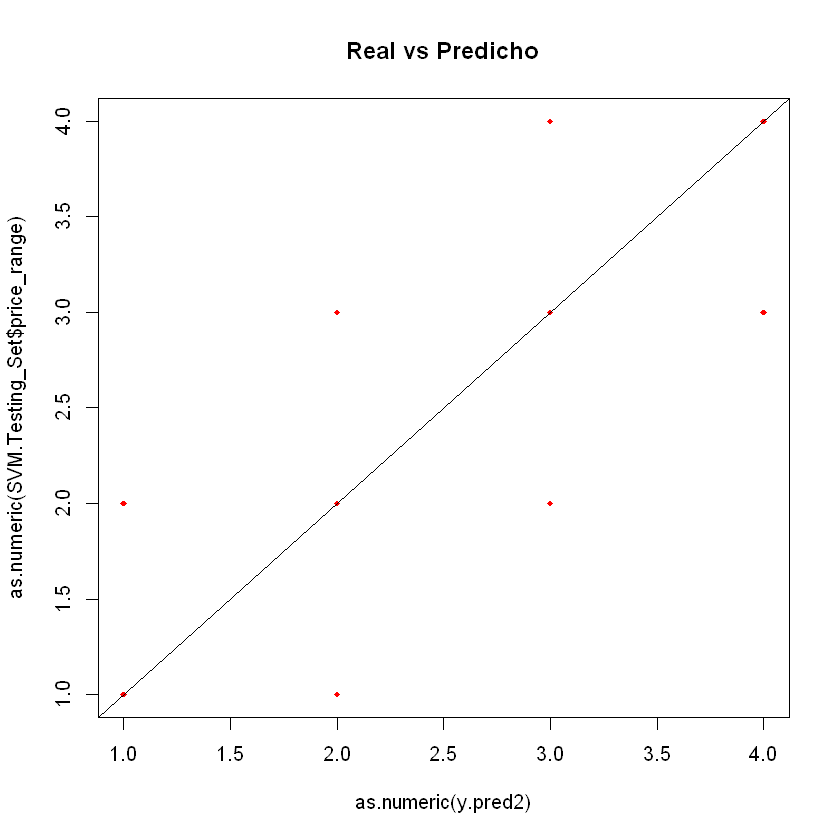

In [58]:
#Graficamos la dispersion del conjunto de testing vs predichos
par(mfrow = c(1, 1))
plot(as.numeric(y.pred2),as.numeric(SVM.Testing_Set$price_range),
     col='red', main="Real vs Predicho",pch=18,cex=0.7)
abline(0,1)

# ALGORITMO DE REDES NEURONALES

In [59]:
summary(mobileData_c2)

 battery_power         blue        clock_speed       dual_sim     
 Min.   : 501.0   Min.   :0.000   Min.   :0.500   Min.   :0.0000  
 1st Qu.: 851.8   1st Qu.:0.000   1st Qu.:0.700   1st Qu.:0.0000  
 Median :1226.0   Median :0.000   Median :1.500   Median :1.0000  
 Mean   :1238.5   Mean   :0.495   Mean   :1.522   Mean   :0.5095  
 3rd Qu.:1615.2   3rd Qu.:1.000   3rd Qu.:2.200   3rd Qu.:1.0000  
 Max.   :1998.0   Max.   :1.000   Max.   :3.000   Max.   :1.0000  
   int_memory        m_dep          mobile_wt        n_cores     
 Min.   : 2.00   Min.   :0.1000   Min.   : 80.0   Min.   :1.000  
 1st Qu.:16.00   1st Qu.:0.2000   1st Qu.:109.0   1st Qu.:3.000  
 Median :32.00   Median :0.5000   Median :141.0   Median :4.000  
 Mean   :32.05   Mean   :0.5018   Mean   :140.2   Mean   :4.521  
 3rd Qu.:48.00   3rd Qu.:0.8000   3rd Qu.:170.0   3rd Qu.:7.000  
 Max.   :64.00   Max.   :1.0000   Max.   :200.0   Max.   :8.000  
       pc            px_width           ram            sc_w       
 M

## Normalizacion de variables de Entrada

- Del resumen de variables se observa que existe cierta variabilidad y diferencias de escala entre valores maximos y minimos de las variables. Por lo tanto debido a que tratamos con redes neuronales, a nivel teorico se exige que las variables de entrada esten escaladas o normalizadas en el mismo rango. En este caso dado que las variables presentan una distribucion asimetrica emplearemos la **funcion de normalizacion**.

In [60]:
#Funcion de normalizacion de datos
normalize <- function(x){
    return((x-min(x))/ (max(x)-min(x)))
}

In [61]:
mobileData_nn<-mobileData_c2
mobileData_nn[,1:16] = normalize(mobileData_nn[,1:16])
head(mobileData_nn)

battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0.2106053,0.0000000000,0.0005502751,0.0000000000,0.001750875,0.0001500750,0.04702351,0.0005002501,0.0005002501,0.1890945,0.6375688,0.0017508754,0.004752376,0.0000000000,0.0000000000,0.0002501251,1
0.2553777,0.0002501251,0.0001250625,0.0002501251,0.013256628,0.0001750875,0.03401701,0.0007503752,0.0015007504,0.4972486,0.6580790,0.0007503752,0.001750875,0.0002501251,0.0002501251,0.0000000000,2
0.1408204,0.0002501251,0.0001250625,0.0002501251,0.010255128,0.0002251126,0.03626813,0.0012506253,0.0015007504,0.4292146,0.6510755,0.0005002501,0.002251126,0.0002501251,0.0002501251,0.0000000000,2
0.1538269,0.0002501251,0.0006253127,0.0000000000,0.002501251,0.0002001001,0.03276638,0.0015007504,0.0022511256,0.4467234,0.6925963,0.0020010005,0.002751376,0.0002501251,0.0000000000,0.0000000000,2
0.4554777,0.0002501251,0.0003001501,0.0000000000,0.011005503,0.0001500750,0.03526763,0.0005002501,0.0035017509,0.3031516,0.3529265,0.0005002501,0.003751876,0.0002501251,0.0002501251,0.0000000000,1
0.4649825,0.0000000000,0.0001250625,0.0002501251,0.005502751,0.0001750875,0.04102051,0.0002501251,0.0017508754,0.4137069,0.2668834,0.0002501251,0.002501251,0.0002501251,0.0000000000,0.0000000000,1


## Conversion de la variable objetivo a variable dummy

In [62]:
#Convertimos la columna de la variable "price_range" en 04 columnas vectores de 1 y 0s.
library(CatEncoders)
x2<-matrix(mobileData_nn$price_range)
oenc <- OneHotEncoder.fit(x2)
z<- transform(oenc,x2,sparse=FALSE)
mobileData_dummy <-data.frame(mobileData_nn,z)
str(mobileData_dummy)

'data.frame':	2000 obs. of  21 variables:
 $ battery_power: num  0.211 0.255 0.141 0.154 0.455 ...
 $ blue         : num  0 0.00025 0.00025 0.00025 0.00025 ...
 $ clock_speed  : num  0.00055 0.000125 0.000125 0.000625 0.0003 ...
 $ dual_sim     : num  0 0.00025 0.00025 0 0 ...
 $ int_memory   : num  0.00175 0.01326 0.01026 0.0025 0.01101 ...
 $ m_dep        : num  0.00015 0.000175 0.000225 0.0002 0.00015 ...
 $ mobile_wt    : num  0.047 0.034 0.0363 0.0328 0.0353 ...
 $ n_cores      : num  0.0005 0.00075 0.00125 0.0015 0.0005 ...
 $ pc           : num  0.0005 0.0015 0.0015 0.00225 0.0035 ...
 $ px_width     : num  0.189 0.497 0.429 0.447 0.303 ...
 $ ram          : num  0.638 0.658 0.651 0.693 0.353 ...
 $ sc_w         : num  0.00175 0.00075 0.0005 0.002 0.0005 ...
 $ talk_time    : num  0.00475 0.00175 0.00225 0.00275 0.00375 ...
 $ three_g      : num  0 0.00025 0.00025 0.00025 0.00025 ...
 $ touch_screen : num  0 0.00025 0.00025 0 0.00025 ...
 $ wifi         : num  0.00025 0 0 0 0 ..

## Division del dataset en Conjuntos de Training y Testing

In [63]:
#Division de conjunto de training y testing
library(caTools)
split = sample.split(mobileData_dummy, SplitRatio = 0.75)
NN.Training_Set = subset(mobileData_dummy, split == TRUE)
NN.Testing_Set = subset(mobileData_dummy, split == FALSE)
#Imprimimos el resultado de conjuntos de training y testing
head(NN.Training_Set)
head(NN.Testing_Set)

battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,X1,X2,X3,X4
0.2106053,0.0000000000,0.0005502751,0.0000000000,0.001750875,0.0001500750,0.04702351,0.0005002501,0.0005002501,0.1890945,...,0.0017508754,0.004752376,0.0000000000,0.0000000000,0.0002501251,1,0,1,0,0
0.2553777,0.0002501251,0.0001250625,0.0002501251,0.013256628,0.0001750875,0.03401701,0.0007503752,0.0015007504,0.4972486,...,0.0007503752,0.001750875,0.0002501251,0.0002501251,0.0000000000,2,0,0,1,0
0.1408204,0.0002501251,0.0001250625,0.0002501251,0.010255128,0.0002251126,0.03626813,0.0012506253,0.0015007504,0.4292146,...,0.0005002501,0.002251126,0.0002501251,0.0002501251,0.0000000000,2,0,0,1,0
0.1538269,0.0002501251,0.0006253127,0.0000000000,0.002501251,0.0002001001,0.03276638,0.0015007504,0.0022511256,0.4467234,...,0.0020010005,0.002751376,0.0002501251,0.0000000000,0.0000000000,2,0,0,1,0
0.4554777,0.0002501251,0.0003001501,0.0000000000,0.011005503,0.0001500750,0.03526763,0.0005002501,0.0035017509,0.3031516,...,0.0005002501,0.003751876,0.0002501251,0.0002501251,0.0000000000,1,0,1,0,0
0.4649825,0.0000000000,0.0001250625,0.0002501251,0.005502751,0.0001750875,0.04102051,0.0002501251,0.0017508754,0.4137069,...,0.0002501251,0.002501251,0.0002501251,0.0000000000,0.0000000000,1,0,1,0,0


,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,X1,X2,X3,X4
14,0.2008504,0.0002501251,0.0005252626,0.0000000000,0.004252126,2.501251e-04,0.04952476,0.0010005003,0.002751376,0.3601801,...,0.0002501251,0.0010005003,0.0002501251,0.0000000000,0.0002501251,2,0,0,1,0
16,0.1938469,0.0000000000,0.0002501251,0.0000000000,0.011505753,1.750875e-04,0.03976988,0.0005002501,0.004002001,0.4662331,...,0.0037518759,0.0027513757,0.0002501251,0.0002501251,0.0002501251,0,1,0,0,0
17,0.2096048,0.0000000000,0.0001250625,0.0000000000,0.003251626,2.501251e-05,0.04902451,0.0020010005,0.001000500,0.4627314,...,0.0022511256,0.0047523762,0.0002501251,0.0000000000,0.0002501251,3,0,0,0,1
19,0.2828914,0.0002501251,0.0001250625,0.0002501251,0.012256128,1.500750e-04,0.02526263,0.0012506253,0.004502251,0.2196098,...,0.0032516258,0.0040020010,0.0002501251,0.0002501251,0.0000000000,1,0,1,0,0
20,0.1705853,0.0002501251,0.0001250625,0.0000000000,0.004752376,2.501251e-04,0.03026513,0.0010005003,0.002751376,0.2661331,...,0.0002501251,0.0045022511,0.0000000000,0.0002501251,0.0002501251,1,0,1,0,0
21,0.1930965,0.0000000000,0.0002751376,0.0002501251,0.009754877,2.001001e-04,0.02026013,0.0017508754,0.003501751,0.4637319,...,0.0037518759,0.0007503752,0.0002501251,0.0002501251,0.0000000000,3,0,0,0,1


## Entrenamiento de la Red Neurronal

In [64]:
library(neuralnet)
set.seed(1234)
neural.model <- neuralnet(X1+X2+X3+X4~.,#
                         rep = 3,
                          threshold= 0.2,
                          data= NN.Training_Set,   
                          hidden = c(7,7),
                          linear.output = FALSE,
                          stepmax=1e6)

In [65]:
#Imprimimos el mejor error alcanzado por el modelo
cat(sprintf("Best error reached: %f", neural.model$result.matrix[c('error'), ]))

Best error reached: 0.332246 Best error reached: 0.335788 Best error reached: 0.381557

## Prediccion de la Red Neuronal

**Comparacion de Resultados Real Test vs Predichos - Por salida de neurona**

In [66]:
#Salida de las 04 neuronas de la Red Neuronal
NN.pred1 <- predict(neural.model,NN.Testing_Set)

results <- data.frame(Real = NN.Testing_Set$price_range, Pred_Class = NN.pred1)
head(results)

,Real,Pred_Class.1,Pred_Class.2,Pred_Class.3,Pred_Class.4
14,2,2.292615e-10,0.0101636873,0.9762780636,1.280554e-03
16,0,9.999314e-01,0.0136827762,0.0001163244,2.997379e-08
17,3,7.518649e-11,0.0009235905,0.0211103816,9.982772e-01
19,1,1.701388e-05,0.9911140083,0.0123192226,3.455287e-08
20,1,1.197855e-05,0.9923964866,0.0178996724,3.706252e-08
21,3,6.728574e-11,0.0010391002,0.0230566860,9.984365e-01


**Comparacion de Resultados Test vs Predichos - Segun Salida Maxima**

In [67]:
#Conversion de 04 vectores a 01 vector categorico
NN.pred1_class <-(apply(NN.pred1,1,which.max)-1) 
#Visualizamos un resumen tabla de los valores reales(test) vs predichos
comp <- data.frame(Real = NN.Testing_Set$price_range, 
                   Prediction = as.integer(data.frame(NN.pred1_class)$NN.pred1_class))
head(comp)

Real,Prediction
2,2
0,0
3,3
1,1
1,1
3,3


## Matriz de la Confusion

In [68]:
#Matriz de confusion
cm2 = confusionMatrix(as.factor(NN.Testing_Set$price_range),
                      as.factor(NN.pred1_class))
print(cm2)

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3
         0 150   0   0   0
         1   0 136   0   0
         2   0   0 135   0
         3   0   0   0 149

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9935, 1)
    No Information Rate : 0.2632     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   1.0000   1.0000   1.0000
Specificity            1.0000   1.0000   1.0000   1.0000
Pos Pred Value         1.0000   1.0000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   1.0000   1.0000
Prevalence             0.2632   0.2386   0.2368   0.2614
Detection Rate         0.2632   0.2386   0.2368   0.2614
Detection Prevalence   0.263

- Se observa que la exactitud es 100%, es decir ha mejorado considerablemente, esto se debe a que localizando el valor maximo de los 04 vectores, minimiza el error al momento de clasificar las clases.

## Visualizacion de la Grafica de Prediccion vs Test

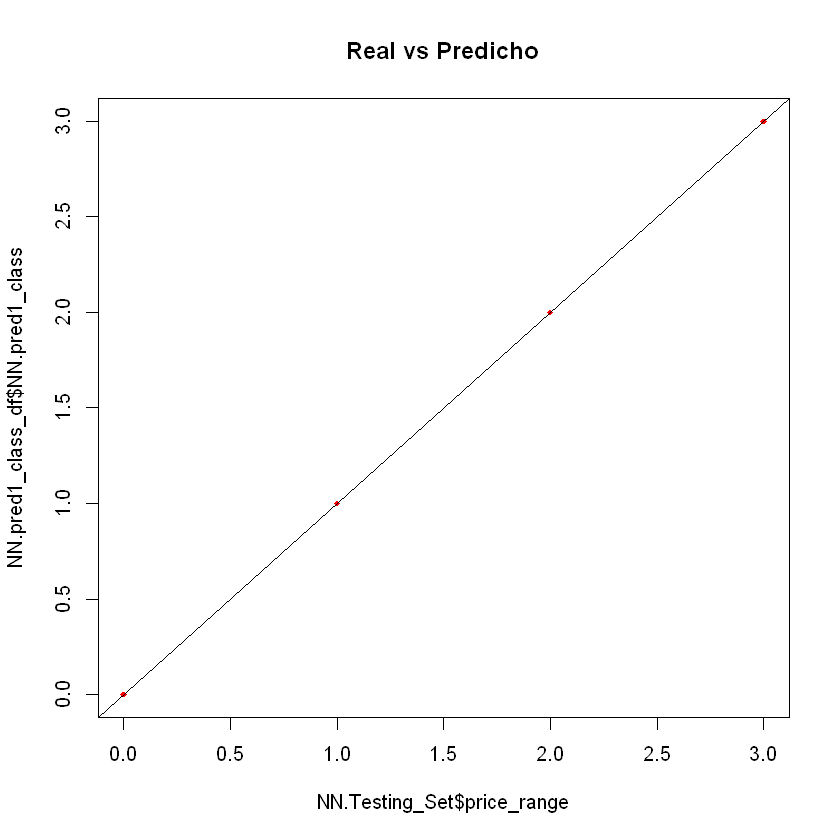

In [69]:
#Conversiona Dataframe de los valores Predichos
NN.pred1_class_df=data.frame(NN.pred1_class)
#Graficamos
par(mfrow=c(1,1))
plot(NN.Testing_Set$price_range ,
     NN.pred1_class_df$NN.pred1_class, 
     col='red', main="Real vs Predicho",pch=18,cex=0.7)
abline(0,1,lwd=1)

# COMPARACION RESULTADOS FINALES

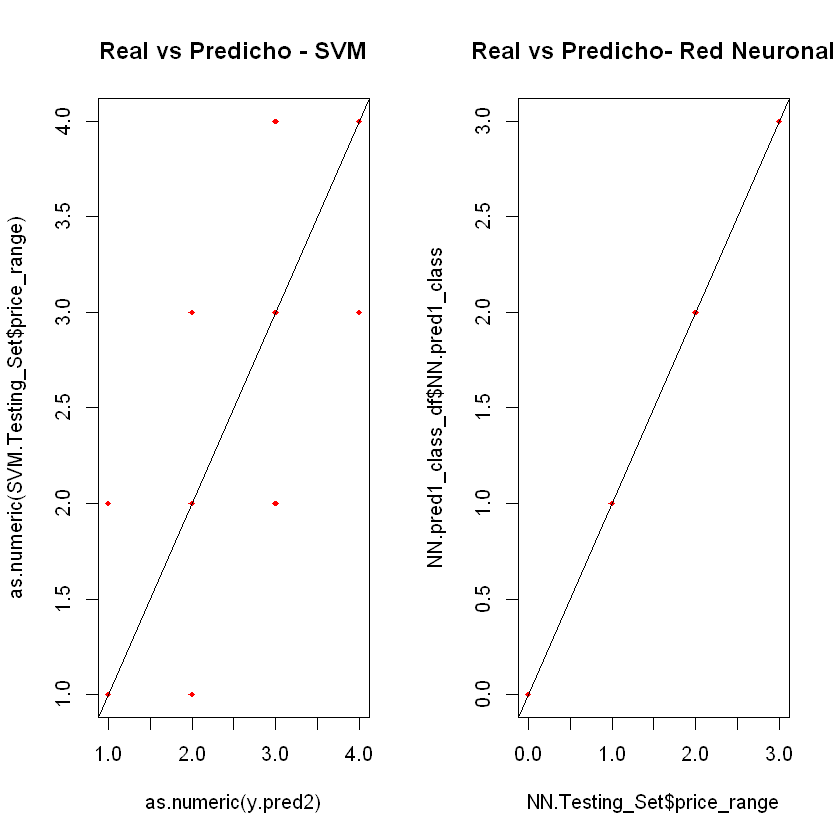

In [70]:
par(mfcol=c(2,2))

#Grafica dispersion de test vs predichos - maquina vector soporte
par(mfrow = c(1, 2))
plot(as.numeric(y.pred2),as.numeric(SVM.Testing_Set$price_range),
     col='red', main="Real vs Predicho - SVM",pch=18,cex=0.7)
abline(0,1)
#Grafica dispersion de test vs predichos - Red neuronal
plot(NN.Testing_Set$price_range ,
     NN.pred1_class_df$NN.pred1_class, 
     col='red', main="Real vs Predicho- Red Neuronal",pch=18,cex=0.7)
abline(0,1)

## Comparacion de Matriz de Confusion

In [71]:
#Calculo de matriz de confusion del modelo de maquina vector soporte
MC<-table(predicho = y.pred2, real = SVM.Testing_Set$price_range)
MC
acierto <- (sum(diag(MC)))/(sum(MC))
cat("acierto - Maquina Vector Soporte:",acierto*100,"%")

        real
predicho  0  1  2  3
       0 94 10  0  0
       1  6 83  5  0
       2  0  7 89  8
       3  0  0  6 92

acierto - Maquina Vector Soporte: 89.5 %

In [72]:
#Matriz de confusion del modelo de red neuronal
cm2 = table(predicho=as.factor(NN.pred1_class),
                      real=as.factor(NN.Testing_Set$price_range))
print(cm2)
acierto <- (sum(diag(cm2)))/(sum(cm2))
cat("acierto - Red Neuronal:",acierto*100,"%")

        real
predicho   0   1   2   3
       0 150   0   0   0
       1   0 136   0   0
       2   0   0 135   0
       3   0   0   0 149
acierto - Red Neuronal: 100 %

**Conclusion:**
- Comparando la matriz de confusion obtenida por ambos modelos, se concluye que el mejor es el algoritmo de Redes Neuronales, dado que mantiene una mejor exactitud independientemente del overfitting que pueda presentar, asimismo considerando de que cada neurona predice un valor entre 0 y 1, pues a pesar que exista un error considerable , esta se mejora cuando localizamos el valor maximo entre las cuatro variables, dejandolo como la clase predicha.
- Por lo contrario la matriz de confusion de la maquina vector soporte(svm) presenta mayor error en la clasificacion.

## Ventajas y Desventajas de los modelos

### Algoritmo de maquina vector soporte

Ventajas:
- Durante pruebas se observa que trabaja relativamente eficiente en memoria, por lo que el costo computacional es ciertamente aceptable ya que dependera tambien en el tiempo que uno tarde en encontrar el parametro coste del modelo.
- El entrenamiento es relativamente facil en comparacion con la Red Neuronal, por lo mismo que parametrizacion se basa principalmente en el coste e identificar el kernel apropiado, lo cual nos facilita identificando el coste mediante la funcion de "Tune".

Desventajas:
- Se observa que mientras mas variables son incluidas en el conjunto de entrenamiento, el error se incrementa, por lo tanto este algoritmo no es adecuado cuando se maneja grandes cantidades de datos.
- Elegir la funcion kernel apropiado no es una tarea facil, podria ser algo complejo, por ejemplo en las pruebas al usar altas dimensiones de Kernel, se generaban bastantes vectores soportes, lo cual hacia que la velocidad de entrenamiento disminuya drasticamente.

### Algoritmo de Red Neuronal

Ventajas:
- Este tipo algoritmo permite resolver problemas complejos independientemente de la cantidad de dataset
- Despues del aprendizaje se observa que pueden inferir relaciones no vistas por el modelo, asi el modelo puede generalizar y predecir con una mejor exactitud que con respecto a la maquina vector soporte.

Desventajas:
- Existe dificultad con la configuracion de las capas y numero de neuronas para entrenar al modelo, asimismo el coste computacional es un factor que se suma ya que impacta en el tiempo en construir el modelo.
- El tiempo que puede tardar en entrenar la red es desconocida, ademas de que no necesariamente nos asegura darnos unos resultados optimos.

## Otros comentarios

Se concluye que el mejor modelo es el algoritmo de Red Neuronal ya que nos da mayor exactitud en la prediccion del modelo, sin embargo el coste computacional es muy elevado al momento de entrenarlo ademas de que necesitamos ir sintonizando la mejor configuracion de capas y numero de neuronas, por lo que seria mas adecuado elegirlo para problemas que posee alta no linealidad y complejidad, ya que permite aproximar cualquier funcion matematica, no obstante el algoritmo de vector soporte trabaja muy bien cuando lo entrenamos con menor cantidad de dataset, teniendo ademas la ventaja de que un menor coste computacional cuando se realiza el entrenamiento de modelo.